<a href="https://colab.research.google.com/github/mechhector/visao_computacional20212/blob/main/q1_mean_filter_DIP_20212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dimensão do kernel desejado: 5
Número de aplicações do filtro: 15
Conteúdo da imagem: joaninha
Padding? 1
Dimensões do Kernel: (5, 5)
Dimensões da Imagem: (321, 481)
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


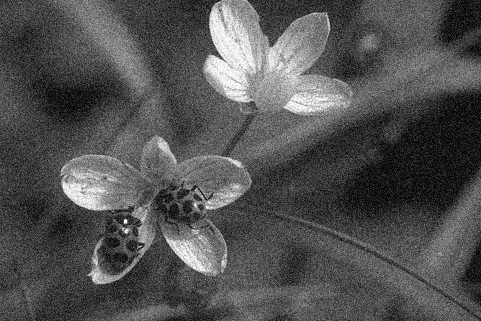

In [ ]:
# PDI 2021.2 Trabalho 1 
# Hector Leonardo Mota Moreira

import numpy as np
import cv2
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow


# ========= Loading the image =========

img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/joaninha.jpg', 0)

# ======== Creating the Kernel ======== 

k = int(input('Dimensão do kernel desejado: '))

kernel = (1/k**2)*np.ones((k,k))

c = int (k/2) # Just do simplify; k is the kernel dimension (k x k)

# ======== Number of Iterations ======== 

n = int(input('Número de aplicações do filtro: '))

# =========== Image Content ============ 

image_content = input('Conteúdo da imagem: ')

# ============== Padding ===============

padding = int(input('Padding? '))

print('Dimensões do Kernel:', kernel.shape)

print('Dimensões da Imagem:', img.shape)

print(kernel)


cv2_imshow(img)

In [ ]:
# Alternative to the .sum() 

def somatorio(array_now,kernel_now):
  
  matrix = array_now * kernel_now 
  sum  = 0
  for j in range(k):
    for l in range(k):
      b = (matrix[l,j]) 
      sum = b + sum
  
  return round(sum)


(325, 485)


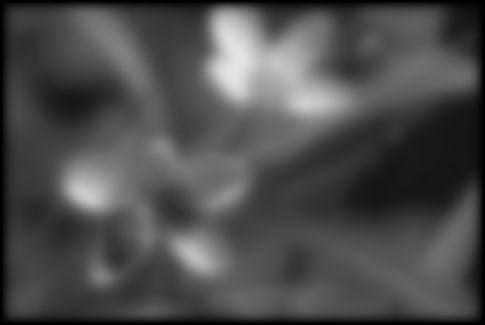

5 15


In [ ]:
# Padding

if padding == 1:

  line, column = (img.shape) 

  holdpdd = np.zeros( ((line + 2 * c), (column + 2 * c)) )  

  new_line, new_column = (holdpdd.shape)

  holdpdd [ c : new_line - c , c : new_column - c ] = img # Based on the Professor Navar's lecture.

  mean_image = holdpdd.copy()
    
  print(holdpdd.shape)

  # Convolution

  for i in range(n): 
    for x in range(c,mean_image.shape[0]-c):
      for y in range(c,mean_image.shape[1]-c):
        
        lol = mean_image[ x - c : x + c + 1 , y - c : y + c + 1 ]
        
        mean = somatorio(lol,kernel)
          
        mean_image [x,y] = round(mean)

  # To remove the padding

  final_image = np.zeros((img.shape[0] , img.shape[1]))

  final_image = mean_image[ c : new_line - c , c : new_column - c ] 


# If padding is not wanted

else:

    mean_image = img.copy()

    for i in range(n): 
      for x in range(c,mean_image.shape[0]-c):
        for y in range(c,mean_image.shape[1]-c):
          
          lol = mean_image[ x - c : x + c + 1 , y - c : y + c + 1 ]
          
          mean = (lol*kernel).sum()
              
          mean_image [x,y] = round(mean)
    
    final_image = np.zeros((img.shape[0] , img.shape[1]))
    final_image = mean_image

cv2_imshow(mean_image)
print(k,n)

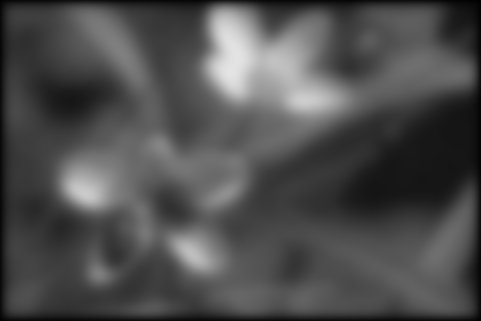

(321, 481)
[[8. 6. 4. 0. 0.]
 [5. 4. 2. 0. 0.]
 [3. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
5 15


True

In [ ]:
# =========== Image Saving ===========

cv2_imshow(final_image)

print(final_image.shape)

print(lol)

print(k,n)

file_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q1_Mean_Filter/{}_k{}n{}pdd{}_mean_filter.png'

cv2.imwrite(file_name.format(image_content,k,n,padding), final_image)

cv2.imwrite(file_name.format(image_content,k,n,padding), final_image) 